# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh.Arsan Akbar
- **Email:** arsan05062003@gmail.com
- **ID Dicoding:** Muh Arsan Akbar

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah sepeda yang disewa?
- Kapan waktu terbaik untuk memaksimalkan pendapatan dari penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

## Data Wrangling

### Gathering Data

Membaca dan memuat tabel day serta hour pada dataset Bike sharing

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

Menampilkan 5 data pertama pada tabel day dan hour

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day dan hour untuk mengakses data yang ada pada tabel tersebut  
- Menampilkan 5 data pertama memungkinkan untuk mengetahui data seperti apa yang ada di tabel day dan hour sehingga memudahkan dalam proses analisis
- tabel day dan hour memiliki kolom dan data yang hampir sama, akan tetapi pada kolom hour terdapat kolom hour yang dalam artian data hour menjelaskan data yang lebih terperinci karena mengandung data per-jamnya juga pada dataset bike sharing

### Assessing Data

#### Menilai Data day_df

memeriksa tipe data dari tiap kolom yang terdapat dalam tabel day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom pada tabel day

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa data duplikat pada tabel day

In [7]:
day_df.duplicated().sum()

0

memeriksa parameter statistik dari kolom numerik yang terdapat dalam customers_df

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

memeriksa tipe data dari tiap kolom yang terdapat dalam tabel hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom pada tabel hour

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa data duplikat pada tabel hour

In [11]:
hour_df.duplicated().sum()

0

memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tabel day dilakukan penilaian data dan hasilnya adalah tidak ada masalah dengan tipe data dari seluruh kolom tersebut, 0 missing values pada setiap kolom, dan 0 inaccurate value.
- Pada tabel hour dilakukan penilaian data dan hasilnya adalah tidak ada masalah dengan tipe data dari seluruh kolom tersebut, 0 missing values pada setiap kolom, dan 0 inaccurate value.

### Cleaning Data

#### Membersihkan Data day_df

Berdasarkan hasil proses assessing data, diketahui bahwa tidak ada masalah duplicate data, missing value, dan inaccurate value yang dijumpai dalam day_df. Hal ini dibuktikan dengan pengecekan dibawah ini.

memeriksa tipe data data dari tiap kolom

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


memeriksa jumlah missing values yang terdapat dalam setiap kolom

In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa duplikasi data

In [15]:
day_df.duplicated().sum()

0

memeriksa parameter statistik

In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Membersihkan data hour_df

Berdasarkan hasil proses assessing data, diketahui bahwa tidak ada masalah duplicate data, missing value, dan inaccurate value yang dijumpai dalam hour_df. Hal ini dibuktikan dengan pengecekan dibawah ini.

memeriksa tipe data data dari tiap kolom

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


memeriksa jumlah missing values yang terdapat dalam setiap kolom

In [18]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

memeriksa duuplikasi data

In [19]:
hour_df.duplicated().sum()

0

memeriksa parameter statistik

In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada tabel day dilakukan pembersihan data dan hasilnya adalah tidak ada masalah dengan tipe data dari seluruh kolom tersebut, 0 missing values pada setiap kolom, dan 0 inaccurate value.
- Pada tabel hour dilakukan pembersihan data dan hasilnya adalah tidak ada masalah dengan tipe data dari seluruh kolom tersebut, 0 missing values pada setiap kolom, dan 0 inaccurate value.

## Exploratory Data Analysis (EDA)

### Explore data day_df

Grouping rata-rata penyewaan berdasarkan kondisi cuaca per-hari

In [21]:
weather_group = day_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print("\nRata-rata penyewaan berdasarkan kondisi cuaca:")
print(weather_group)


Rata-rata penyewaan berdasarkan kondisi cuaca:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


Grouping total penyewaan berdasarkan bulan

In [22]:

monthly_group = day_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)
print("\nTotal penyewaan berdasarkan bulan:")
print(monthly_group)


Total penyewaan berdasarkan bulan:
mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64


Rata-rata penyewaan per hari kerja dan musim

In [23]:
weekday_season_pivot = day_df.pivot_table(values='cnt', index='weekday', columns='season', aggfunc='mean')
print("\nPivot Table: Rata-rata Penyewaan per Hari Kerja dan Musim:")
print(weekday_season_pivot)


Pivot Table: Rata-rata Penyewaan per Hari Kerja dan Musim:
season             1            2            3            4
weekday                                                    
0        2229.444444  4986.538462  5324.269231  4451.961538
1        2452.730769  4565.000000  5627.192308  4698.846154
2        2792.520000  4824.961538  5656.111111  4658.923077
3        2611.080000  4835.074074  5853.851852  4766.800000
4        2894.200000  5200.269231  5698.607143  4730.880000
5        2856.307692  5222.769231  5750.629630  4898.680000
6        2432.333333  5334.192308  5584.962963  4906.040000


Grouping rata-rata penyewaan berdasarkan kondisi cuaca per-jamnya

In [24]:
weather_group_hour = hour_df.groupby('weathersit')['cnt'].mean()
print("\nRata-rata penyewaan berdasarkan kondisi cuaca:")
print(weather_group_hour)


Rata-rata penyewaan berdasarkan kondisi cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


Grouping rata-rata penyewaan per jam

In [25]:
hourly_group = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print("\nRata-rata penyewaan berdasarkan jam:")
print(hourly_group)


Rata-rata penyewaan berdasarkan jam:
hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64


Total penyewaan per jam dan hari kerja

In [26]:
hour_weekday_pivot = hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='sum')
print("\nPivot Table: Total Penyewaan per Jam dan Hari Kerja:")
print(hour_weekday_pivot)


Pivot Table: Total Penyewaan per Jam dan Hari Kerja:
weekday      0      1      2      3      4      5      6
hr                                                      
0         9775   3571   2790   3594   4045   5453   9902
1         8053   1800   1254   1595   1774   2571   7117
2         6286   1021    687    797    934   1325   5302
3         3239    496    382    484    497    673   2403
4          955    567    508    477    528    589    804
5          852   2252   2470   2678   2669   2486    854
6         1493   8930  10863  11212  11066   9363   2205
7         3476  25848  30569  31614  31388  26450   4826
8         8805  42868  48122  50786  50323  48077  12020
9        16437  22718  24118  24807  24810  26935  19613
10       27151  14459  13181  13717  13654  16404  27691
11       33115  17024  14924  15829  16360  19564  34504
12       39161  21581  18826  20166  20550  24715  39415
13       39368  21384  19031  19326  20233  25113  40464
14       38181  20041  17510  1773

**Insight:**
- Penyewaan sepeda paling tinggi terjadi saat cuaca cerah atau mendung ringan, sedangkan cuaca buruk seperti hujan atau salju membuat penyewaan menurun drastis.
- Musim panas dan musim gugur adalah periode dengan penyewaan sepeda tertinggi, terutama di bulan Juni hingga September.
- Pada hari kerja, penyewaan sepeda memuncak di pagi hari (sekitar pukul 08:00) dan sore hari (sekitar pukul 17:00–18:00) dan di akhir pekan penyewaan lebih banyak terjadi di siang hingga sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca terhadap jumlah sepeda yang disewa?

C:\Users\arsan\AppData\Local\Temp\ipykernel_4004\2204124806.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_group.index, y=weather_group.values, palette=colors)
C:\Users\arsan\AppData\Local\Temp\ipykernel_4004\2204124806.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=weather_group.index, y=weather_group.values, palette=colors)


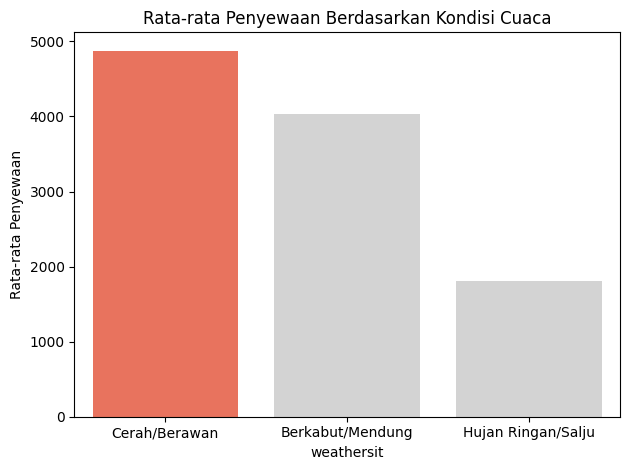

In [27]:
weather_group = day_df.groupby('weathersit')['cnt'].mean()

colors = ["#FF6347", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x=weather_group.index, y=weather_group.values, palette=colors)
plt.title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(ticks=[0, 1, 2], labels=["Cerah/Berawan", "Berkabut/Mendung", "Hujan Ringan/Salju"])
plt.tight_layout()
plt.show()


### Pertanyaan 2: Kapan waktu terbaik untuk memaksimalkan pendapatan dari penyewaan sepeda?

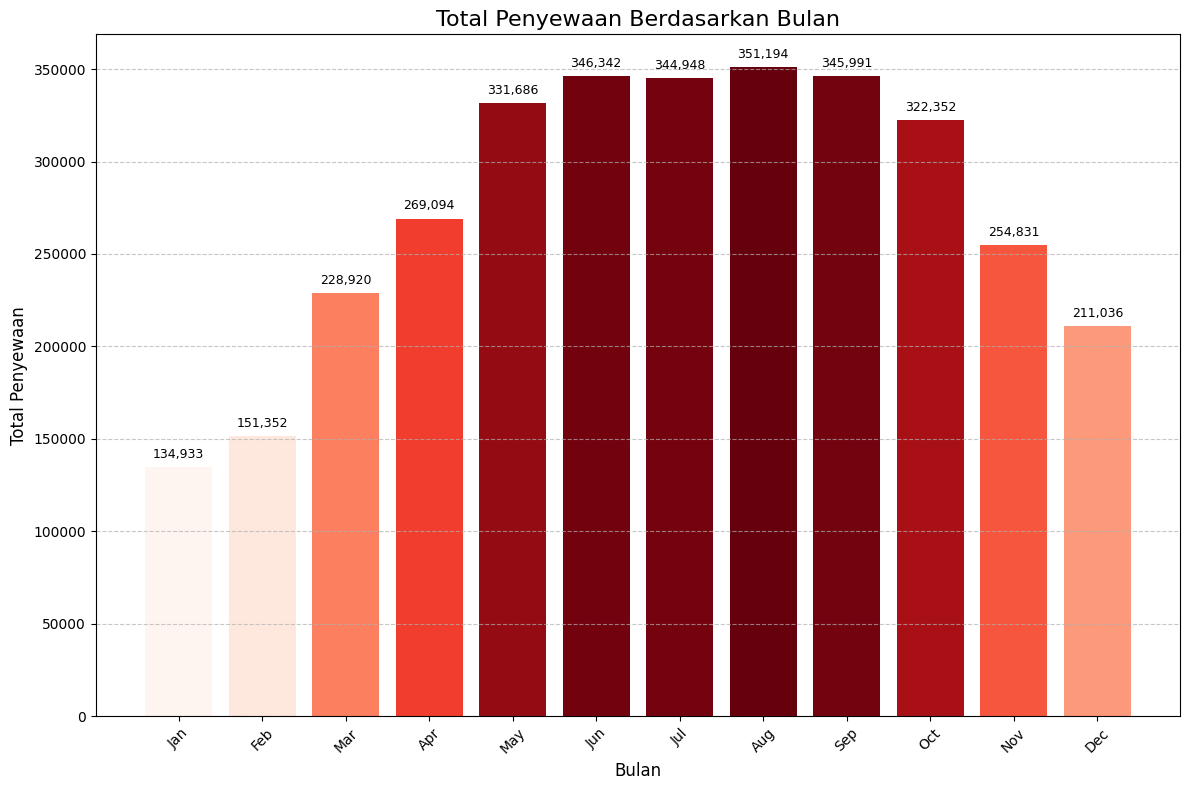

In [28]:
values = monthly_group.values
labels = monthly_group.index

bulan_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

labels = [bulan_order[int(label) - 1] for label in labels]

sorted_indices = [bulan_order.index(label) for label in labels]
values = np.array(values)[np.argsort(sorted_indices)]
labels = np.array(labels)[np.argsort(sorted_indices)]

norm = Normalize(vmin=min(values), vmax=max(values))
colors = plt.cm.Reds(norm(values)) 

plt.figure(figsize=(12, 8))
bars = plt.bar(labels, values, color=colors)

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'{value:,}', ha='center', fontsize=9)

plt.title("Total Penyewaan Berdasarkan Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


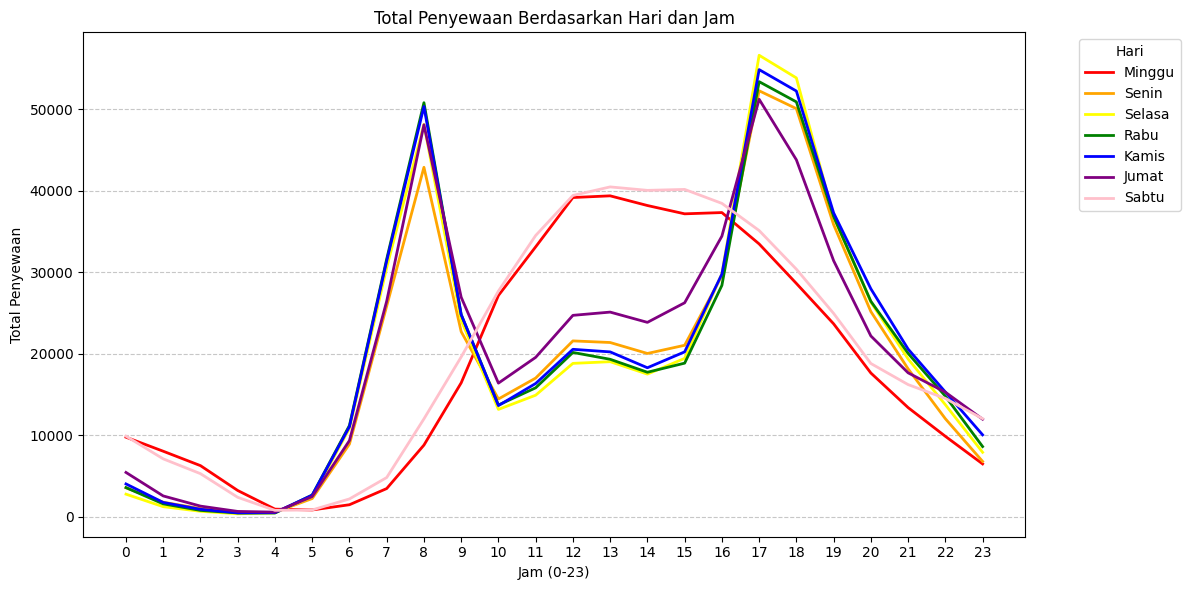

In [29]:
hour_weekday_pivot = hour_df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='sum')

plt.figure(figsize=(12, 6))
days = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']

for i, day in enumerate(days):
    plt.plot(hour_weekday_pivot.index, hour_weekday_pivot[hour_weekday_pivot.columns[i]],
             label=day, color=colors[i], linewidth=2)

plt.title("Total Penyewaan Berdasarkan Hari dan Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Total Penyewaan")
plt.xticks(range(0, 24))
plt.legend(title="Hari", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Insight:**

**Pengaruh Kondisi Cuaca terhadap Penyewaan**
- Rata-rata penyewaan tertinggi terjadi pada cuaca cerah atau berawan ringan dengan 4.876 sepeda/hari, diikuti cuaca mendung ringan dengan 4.035 sepeda/hari.
- Penyewaan sangat rendah pada cuaca hujan ringan atau salju dengan hanya 1.803 sepeda/hari, dan hampir tidak ada penyewaan pada cuaca buruk ekstrem.

**Total Penyewaan Berdasarkan Bulan**
- Musim panas (Juni–Agustus) memiliki jumlah penyewaan tertinggi, dengan Agustus (351.194 penyewaan) sebagai bulan puncak, diikuti Juni dan September.
- Musim dingin (Desember–Februari) memiliki penyewaan terendah, terutama Januari dengan hanya 134.933 penyewaan.

**Pola Penyewaan Berdasarkan Jam dan Hari Kerja**
- Hari kerja (Senin–Jumat) memiliki lonjakan besar pada jam sibuk pagi (08:00) dan sore (17:00–18:00).
- Akhir pekan (Sabtu dan Minggu) menunjukkan distribusi lebih merata sepanjang siang dan sore hari, dengan puncak sekitar pukul 12:00–15:00.

## Analisis Lanjutan (Opsional)

**Clustering Manual**

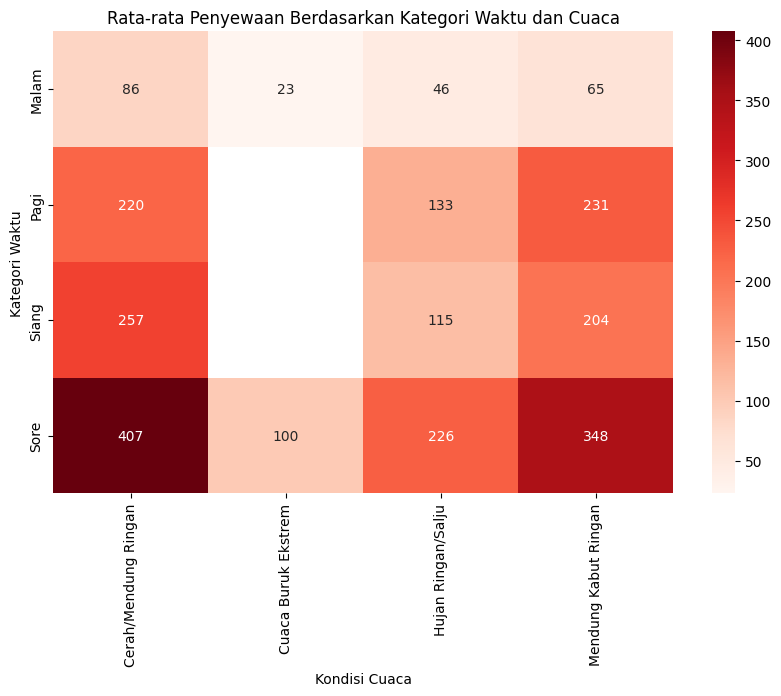

In [30]:
def time_of_day(hour):
    if 6 <= hour < 10:
        return "Pagi"
    elif 10 <= hour < 16:
        return "Siang"
    elif 16 <= hour < 20:
        return "Sore"
    else:
        return "Malam"

hour_df['time_category'] = hour_df['hr'].apply(time_of_day)

def weather_category(weather):
    if weather == 1:
        return "Cerah/Mendung Ringan"
    elif weather == 2:
        return "Mendung Kabut Ringan"
    elif weather == 3:
        return "Hujan Ringan/Salju"
    else:
        return "Cuaca Buruk Ekstrem"

hour_df['weather_category'] = hour_df['weathersit'].apply(weather_category)

time_weather_group = hour_df.groupby(['time_category', 'weather_category'])['cnt'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(time_weather_group, cmap="Reds", annot=True, fmt=".0f", cbar=True)
plt.title("Rata-rata Penyewaan Berdasarkan Kategori Waktu dan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Kategori Waktu")
plt.show()


## Conclusion

**Kesimpulan untuk kedua pertanyaan**
- Bagaimana pengaruh faktor cuaca terhadap jumlah sepeda yang disewa?
Penyewaan sepeda tertinggi terjadi pada cuaca cerah atau mendung ringan dan sangat menurun pada cuaca buruk seperti hujan atau salju.
- Kapan waktu terbaik untuk memaksimalkan pendapatan dari penyewaan sepeda?
Musim panas (Juni–Agustus) dan jam sibuk pagi (08:00) serta sore (17:00–18:00) adalah periode optimal untuk memaksimalkan pendapatan.

**Solusi (Optional)**

Meningkatkan promosi di hari-hari dengan prakiraan cuaca cerah serta mengurangi operasional sepeda di hari-hari dengan cuaca buruk untuk efisiensi. Selanjutnya menambah jumlah sepeda di musim panas, terutama pada jam sibuk pagi dan sore dan mengadakan diskon atau promosi khusus di siang hari untuk meningkatkan penyewaan di waktu yang kurang sibuk.